<a href="https://colab.research.google.com/github/mbrimmer/Sample_Projects/blob/master/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification with KNN and Naive Bayes

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [0]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.utils.multiclass import unique_labels
from sklearn import preprocessing


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [0]:
def print_image(f):
  ''' Helper function to print image passed in '''
  plt.xticks([])
  plt.yticks([])
  plt.imshow(f.reshape(28,28), cmap='gray')
  plt.show();

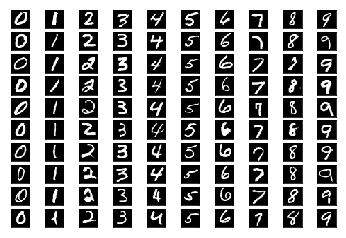

In [4]:
def P1(num_examples=10):
  
  ### STUDENT START ###
  # Set up Dictionary of indices for each label
  d = {}
  digits = ['0','1','2','3','4','5','6','7','8','9']
  for digit in digits:
    d[digit] = np.where(mini_train_labels == digit)


  index=1
  for example in range(1,num_examples+1):
    for j in range(0,10):
      plt.subplot(num_examples,10, index)
      # Labels aren't needed -- self explanatory what each column is
      #     plt.title('Label={}'.format(mini_train_labels[d['{}'.format(j)][0][row]]))
      plt.xticks([])
      plt.yticks([])
      plt.imshow(mini_train_data[d['{}'.format(j)][0][example]].reshape(28,28), cmap='gray')
      index+=1

  ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [0]:
# Defining my own accuracy score because we can't import any new libraries
# Would use 'accuracy_score' from sklearn allowed

def my_accuracy_score(true_labels, pred_labels):
  # assuming shapes are same for now
  correct_count = (true_labels==pred_labels).sum()
  return correct_count/true_labels.shape[0]
#   print("correct: {}, total: {}, acc={}".format(correct_count,
#                                                 true_labels.shape[0],
#                                                 correct_count/true_labels.shape[0]
#                                                ))

In [6]:
def P2(k_values):
  ### STUDENT START ###
  digits = ['0','1','2','3','4','5','6','7','8','9']
  
  for kval in k_values:
    neigh = KNeighborsClassifier(n_neighbors=kval)
    neigh.fit(mini_train_data, mini_train_labels) 

    y_pred = neigh.predict(dev_data)

    

    if kval == 1:
      print("Classification Report for K=1")
      print(classification_report(dev_labels, y_pred,
                               labels=np.asarray(digits)))
    
    print("Accuracy for k={}: {}".format(kval, my_accuracy_score(dev_labels, y_pred)))
  ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification Report for K=1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy for k=1: 0.884
Accuracy for k=3: 0.876
Accuracy for k=5: 0.882
Accuracy for k=7: 0.877
Accuracy for k=9: 0.875


ANSWER: The most difficult digit is 8. We see this across the board with the lowest f1, precision, and recall scores

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [7]:
#train_data, train_labels
def P3(train_sizes, accuracies):
  
  ### STUDENT START ###
  k=1


  for i, size in enumerate(train_sizes):
    neigh = KNeighborsClassifier(n_neighbors=k)
    
    # Given that we've shuffled the data above, just taking first "size"
    neigh.fit(train_data[:size], train_labels[:size])
    
    start_time = time.time()
    y_pred = neigh.predict(dev_data)
    end_time = time.time()

    acc = my_accuracy_score(dev_labels, y_pred)
    accuracies.append(acc)
    print("Accuracy for size={}: {}, Prediction Time (sec)={}".\
          format(size, acc, round(end_time-start_time,1)))
  ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)
print('Accuracies={}'.format(accuracies))

#TODO - ADD TIMING IN HERE

Accuracy for size=100: 0.702, Prediction Time (sec)=0.2
Accuracy for size=200: 0.791, Prediction Time (sec)=0.3
Accuracy for size=400: 0.811, Prediction Time (sec)=0.5
Accuracy for size=800: 0.866, Prediction Time (sec)=1.1
Accuracy for size=1600: 0.905, Prediction Time (sec)=2.1
Accuracy for size=3200: 0.927, Prediction Time (sec)=4.2
Accuracy for size=6400: 0.939, Prediction Time (sec)=10.1
Accuracy for size=12800: 0.952, Prediction Time (sec)=21.5
Accuracy for size=25000: 0.962, Prediction Time (sec)=43.4
Accuracies=[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.962]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Prediction for 60K (base model)=1.24
Prediction for 60K (Model 2)=1.03
Prediction for 60K (Model 3)=0.98
Prediction for 60K (Model 4)=0.96
Prediction for 60K (Model 5)=0.98


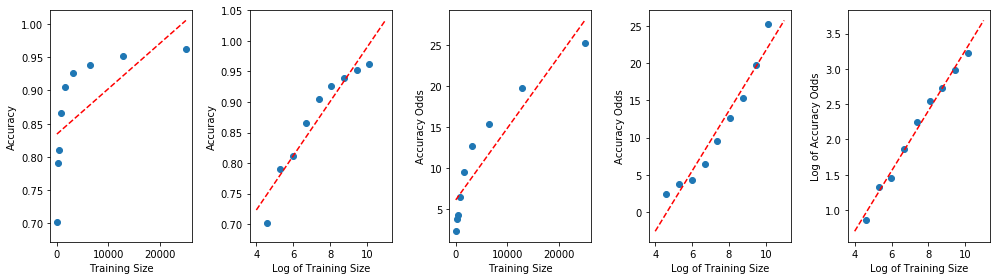

In [8]:
def P4():
  plt.figure(figsize=(14,4),facecolor='white')
  ### STUDENT START ###

  ax1 = plt.subplot(1,5,1)
  plt.scatter(train_sizes,accuracies)
  ax1.set_xlabel('Training Size')
  ax1.set_ylabel('Accuracy')
  reg = LinearRegression()
  reg.fit(np.asarray(train_sizes).reshape(-1, 1), 
          np.asarray(accuracies).reshape(-1, 1))
  X_plot = np.linspace(0,25000,num=50)
  plt.plot(X_plot, X_plot*reg.coef_[0][0] + reg.intercept_[0],
          color='red', linestyle='dashed')
  print("Prediction for 60K (base model)={}".\
         format(reg.predict(np.array(60000).reshape(-1, 1))[0][0].round(2)))
  
  # ---------Plot 2 - use log of training size----------
  ax2=plt.subplot(1,5,2)
  log_train_sizes=np.log(train_sizes)
  plt.scatter(log_train_sizes,accuracies)
  ax2.set_xlabel('Log of Training Size')
  ax2.set_ylabel('Accuracy')
  
  reg2 = LinearRegression()
  reg2.fit(np.asarray(log_train_sizes).reshape(-1, 1), 
          np.asarray(accuracies).reshape(-1, 1))
  X_plot = np.linspace(4,11,num=50)
  plt.plot(X_plot, X_plot*reg2.coef_[0][0] + reg2.intercept_[0],
          color='red', linestyle='dashed')
  print("Prediction for 60K (Model 2)={}".\
         format(reg2.predict(np.array(np.log(60000)).\
                                reshape(-1, 1))[0][0].round(2)))
  
  # ----------Plot 3 - Use Odds Ratios----------
  ax3=plt.subplot(1,5,3)
  accuracies_odds = np.asarray(accuracies)/(1-np.asarray(accuracies))
  accuracies_log_odds = np.log(accuracies_odds)
  plt.scatter(train_sizes,accuracies_odds)
  ax3.set_xlabel('Training Size')
  ax3.set_ylabel('Accuracy Odds')
  
  reg3 = LinearRegression()
  reg3.fit(np.asarray(train_sizes).reshape(-1, 1), 
          accuracies_odds.reshape(-1, 1))
  X_plot = np.linspace(0,25000,num=50)
  plt.plot(X_plot, X_plot*reg3.coef_[0][0] + reg3.intercept_[0],
          color='red', linestyle='dashed')

  odds_pred = reg3.predict(np.array(60000).reshape(-1,1))
  acc_pred = (odds_pred/(1+odds_pred))[0][0].round(2)
  print("Prediction for 60K (Model 3)={}".format(acc_pred))
                                      
  

  # ----------Plot 4 - Use Odds Ratios, log of training size axis----------
  ax4=plt.subplot(1,5,4)
  plt.scatter(log_train_sizes,accuracies_odds)
  ax4.set_xlabel('Log of Training Size')
  ax4.set_ylabel('Accuracy Odds')
  
  reg4 = LinearRegression()
  reg4.fit(np.asarray(log_train_sizes).reshape(-1, 1), 
          accuracies_odds.reshape(-1, 1))
  X_plot = np.linspace(4,11,num=50)
  plt.plot(X_plot, X_plot*reg4.coef_[0][0] + reg4.intercept_[0],
          color='red', linestyle='dashed')
  
  odds_pred = reg4.predict(np.array(np.log(60000)).reshape(-1,1))
  acc_pred = (odds_pred/(1+odds_pred))[0][0].round(2)
  print("Prediction for 60K (Model 4)={}".format(acc_pred))
  
  # ----------Plot 5 - Use log Odds Ratios, log of training size ----------
  ax5=plt.subplot(1,5,5)
  plt.scatter(log_train_sizes,np.log(accuracies_odds))
  ax5.set_xlabel('Log of Training Size')
  ax5.set_ylabel('Log of Accuracy Odds')
  
  reg5 = LinearRegression()
  reg5.fit(np.asarray(log_train_sizes).reshape(-1, 1), 
          np.log(accuracies_odds).reshape(-1, 1))
  X_plot = np.linspace(4,11,num=50)
  plt.plot(X_plot, X_plot*reg5.coef_[0][0] + reg5.intercept_[0],
          color='red', linestyle='dashed')
  plt.tight_layout()
  
  odds_pred = np.exp(reg5.predict(np.array(np.log(60000)).reshape(-1,1)))
  acc_pred = (odds_pred/(1+odds_pred))[0][0].round(2)
  print("Prediction for 60K (Model 5)={}".format(acc_pred))
  ### STUDENT END ###

P4()

ANSWER: A standard linear regression (left figure above) predicts an accuracy of 1.24 which is non-sensical because in this instance, the output range should be between 0 and 1. The best esitmate of the above is Model 5 (far right), which predicts an accuracy of 0.98.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix: Rows = True Label, Columns = Predicted Label
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

Evaluating misses by raw number of misses:
Most Missed True: 9, Most Frequent Miss: 4
Missed Number of Times: 11


A few misclassification examples: 


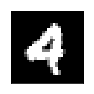

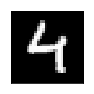

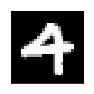

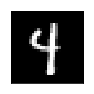

In [9]:
def P5():
  
  ### STUDENT START ###
  k = 1
  nExamples = 4
  size=1000 # remove later
  digits = ['0','1','2','3','4','5','6','7','8','9']
  
  neigh = KNeighborsClassifier(n_neighbors=k)
    
  # Given that we've shuffled the data above, just taking first "size"
  neigh.fit(train_data[:size], train_labels[:size])
  y_pred = neigh.predict(dev_data)
  
  cm = confusion_matrix(dev_labels, y_pred, labels=np.asarray(digits))
  print("Confusion Matrix: Rows = True Label, Columns = Predicted Label")
  print(cm)
  print()
  
  # Find most confused pair of digits -- method 1 by raw count
  most_missed_amt=0
  most_missed_pred_index = 0
  most_missed_true_index = 0 
  for true_index in range(0,10,1):
    for pred_index in range(0,10,1):
      if true_index != pred_index and \
          cm[true_index][pred_index] > most_missed_amt:
        most_missed_amt = cm[true_index][pred_index]
        most_missed_pred_index = true_index
        most_missed_true_index = pred_index
  
  print('Evaluating misses by raw number of misses:')
  print("Most Missed True: {}, Most Frequent Miss: {}".\
          format(most_missed_true_index,
                 most_missed_pred_index
                ))
  print("Missed Number of Times: {}".format(most_missed_amt))
  
# Below commented out because can't import pandas -- was going to create
# heatmap using seaborn

#   pdf = pd.DataFrame(cm, columns=digits, index=digits)
  
#   #note, for dataframe, colums are predicted label, rows are actual label
#   pdf_norm_np = pdf.div(pdf.sum(axis=1), axis=0).round(2).values
#   pdf_norm = pdf.div(pdf.sum(axis=1), axis=0).reset_index().\
#     rename(columns={'index':'True_Label'})

#   pdf_norm_tidy = pd.melt(pdf_norm, id_vars='True_Label',
#                        var_name="Predicted_Label",
#                        value_name="Percent")
  
  
#   print('Note the above holds when looking relative to the number of true cases')
#   plt.figure(figsize=(15,6))
#   ax1 = plt.subplot(1,3,1)
#   ax1 = sns.heatmap(pdf_norm_np, annot=True, cmap='Blues', ax=ax1)
#   ax1.set_xlabel('Predicted Label')
#   ax1.set_ylabel('True Label')
  
  print("\n\nA few misclassification examples: ")
  
  misclass_examples = np.where( (dev_labels==str(most_missed_pred_index)) \
        & (y_pred == str(most_missed_true_index )))[0]
  
  
#   print(misclass_examples[0])
  for m in range(1,nExamples+1):
    plt.subplot(1,nExamples,m)
    print_image(dev_data[misclass_examples[m]])
    
  ### STUDENT END ###


P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

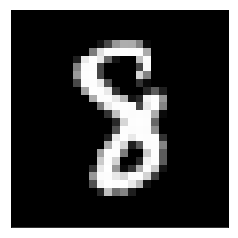

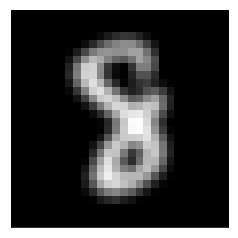

In [10]:
def Blur_Image(img,cols=28):
  '''Input: 784 pixel values between 0 and 1 to be blurred
  for simplicity, since edges are typically black (0), will leave these as 
  their original values. Other values will be average of itself and neighbors
  '''
  img = img.reshape(cols,cols)
  new_img=img.copy()
  
  for i in range(1,cols-1):
    for j in range(1,cols-1):
      # Add all 9 cells (including itself) to average
      new_img[i][j] = (img[i-1][j-1] + img[i-1][j] + img[i-1][j+1] + \
                        img[i][j-1] + img[i][j] + img[i][j+1] + \
                        img[i+1][j-1] + img[i+1][j] + img[i+1][j+1]) / 9
  
  return new_img.reshape(cols*cols)

#Testing
print_image(dev_data[0])
print_image(Blur_Image(dev_data[0]))
np.vectorize(Blur_Image);

In [11]:
def P6():
#   mini_train_data, mini_train_labels
  ### STUDENT START ###
  
  # Preprocessing
  mini_train_data_Blur = np.apply_along_axis(Blur_Image, 1, mini_train_data)
  dev_data_Blur = np.apply_along_axis(Blur_Image, 1, dev_data)
#   print(mini_train_data.shape, mini_train_data_Blur.shape)
  
  k = 1
  neigh = KNeighborsClassifier(n_neighbors=k)
    
    #------Model 1 - Blur Training, not Dev ----------
  neigh.fit(mini_train_data_Blur, mini_train_labels)
  y_pred = neigh.predict(dev_data)
  acc = my_accuracy_score(dev_labels, y_pred)
  print("Model 1 Blur Only Training accuracy: {}".format(acc))
  
  #------Model 2 - Blur Dev, not Training ----------
  neigh.fit(mini_train_data, mini_train_labels)
  y_pred = neigh.predict(dev_data_Blur)
  acc = my_accuracy_score(dev_labels, y_pred)
  print("Model 2 Blur Only Dev accuracy: {}".format(acc))

  #------Model 3 - Blur Training and Dev ----------
  neigh.fit(mini_train_data_Blur, mini_train_labels)
  y_pred = neigh.predict(dev_data_Blur)
  acc = my_accuracy_score(dev_labels, y_pred)
  print("Model 3 Blur Training and Dev accuracy: {}".format(acc))

### STUDENT END ###

P6()

Model 1 Blur Only Training accuracy: 0.907
Model 2 Blur Only Dev accuracy: 0.868
Model 3 Blur Training and Dev accuracy: 0.905


ANSWER: From this sample, it appearst that the blurring of the training set produces slightly better results than the dev set and/or both although with a small margin that's it's unclear if this is due to noise or if this is statistically significant. More work would be needed to determine this.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [0]:
grey_lower_threshold = 0.2
grey_upper_threshold = 0.8
bins = np.array([-1, grey_lower_threshold, grey_upper_threshold, 1])

mini_train_data_mult_class = np.digitize(mini_train_data, bins, right=True)
dev_data_mult_class = np.digitize(dev_data, bins, right=True)

# Print a few of the binned images
# print_image(mini_train_data_mult_class[0])
# print_image(mini_train_data_mult_class[1])

In [13]:
def P7():
  
  ### STUDENT START ###
  # Bernoulli Naive Bayes
  bern_NB = BernoulliNB(binarize=0)
  bern_NB.fit(mini_train_data, mini_train_labels)
  y_pred = bern_NB.predict(dev_data)
  acc = my_accuracy_score(dev_labels, y_pred)
  print("Bernoulli NB accuracy: {}".format(acc))

  
  # MultinomialNB Naive Bayes

  mult_NB = MultinomialNB()
  mult_NB.fit(mini_train_data_mult_class, mini_train_labels)
  y_pred = mult_NB.predict(dev_data_mult_class)
  acc = my_accuracy_score(dev_labels, y_pred)
  print("MultinomialNB NB accuracy: {}".format(acc))
  
### STUDENT END ###

P7()

Bernoulli NB accuracy: 0.809
MultinomialNB NB accuracy: 0.797


ANSWER: The multiclass does not improve accuracy. This is likely due to the nature of the problem -- there really is no valuable information value from the additional class of data. Either the mark is being made in a pixel or it's not. This is really a binary type of problem.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [14]:
def P8(alphas):
  
  ### STUDENT START ###
  bern_NB=BernoulliNB(binarize=0)
  grid = GridSearchCV(bern_NB, alphas, cv=5, scoring='accuracy', refit=True,
                     verbose=0)
  grid.fit(mini_train_data, mini_train_labels)
  
  print('Best Params: {}'.format(grid.best_params_))
  y_pred = grid.predict(dev_data)
  print(my_accuracy_score(dev_labels, y_pred))
  
  # Now what is accuracy when alpha=0?
  y_pred_alpha0 = BernoulliNB(alpha=0, binarize=0).\
    fit(mini_train_data, mini_train_labels).predict(dev_data)
  print("Accuracy when alpha=0: {}".format(my_accuracy_score(dev_labels, y_pred)))
  
### STUDENT END ###
  return grid

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best Params: {'alpha': 0.001}
0.823
Accuracy when alpha=0: 0.823


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [15]:
# Now Calculate accuracy when alpha = 0
bern_NB=BernoulliNB(binarize=0, alpha=0)
bern_NB.fit(mini_train_data, mini_train_labels)
  
y_pred = bern_NB.predict(dev_data)
print("Accuracy when alpha=0: {}".format(my_accuracy_score(dev_labels, y_pred)))

Accuracy when alpha=0: 0.816


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [16]:
print (nb.best_params_)

{'alpha': 0.001}


ANSWER: The best value for alpha is 0.001. With less alpha (smoothing), the accuracy suffers as can be seen with alpha=0. This isn't terribly surprising,.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Accuracy on GaussianNB: 
# pixels with values > epsilon: 268
0.78


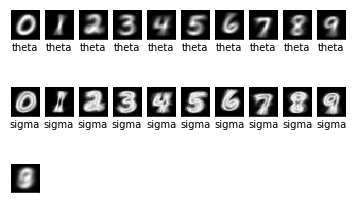

In [17]:
def P9():
  
  ### STUDENT END ###
  gnb=GaussianNB()
  gnb.fit(mini_train_data, mini_train_labels)
  
  y_pred = gnb.predict(dev_data)
  print("Accuracy on GaussianNB: ".format(my_accuracy_score(dev_labels, y_pred)))
#   print("nClasses {}".format(gnb.class_count_.shape))
#   print("Theta {}".format(gnb.theta_.shape))
#   print("Sigma: {}".format(gnb.sigma_.shape))

  # Plotting Thetas and Sigmas to gain insight
  for j in range(0,10):
    plt.subplot(3,10, j+1)
    plt.xticks([])
    plt.xlabel('theta')
    plt.yticks([])
    plt.imshow(gnb.theta_[j].reshape(28,28), cmap='gray')
    plt.subplot(3,10, j+1+10)
    plt.xticks([])
    plt.xlabel('sigma')
    plt.yticks([])
    plt.imshow(gnb.sigma_[j].reshape(28,28), cmap='gray')

  # Insight from images -- there are a lot of 0 theta(mean) and 0 sigma (stdev)
  # on the top and sides - maybe we remove these pixels?
  
  # remove all pixels that have a mean value below epsilon and rerun
  mean_thetas = gnb.theta_.mean(axis=0)
  plt.subplot(3,10, 21)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(mean_thetas.reshape(28,28), cmap='gray')
  
  epsilon = 0.15
  
#   print("Shape: {}".format(mini_train_data.shape))
  
#   print("Mean Thetas Shape: {}".format((mean_thetas>epsilon).shape))
  print("# pixels with values > epsilon: {}".format((mean_thetas>epsilon).sum()))
  
#   print('Mini Train Data Shape: {}'.format(mini_train_data.shape))
  mini_train_data_trimmed = mini_train_data[:,np.where((mean_thetas>epsilon))][:,0,:]
  dev_data_trimmed = dev_data[:,np.where((mean_thetas>epsilon))][:,0,:]

  # Refit and calculate accuracies
  gnb2=GaussianNB()
  gnb2.fit(mini_train_data_trimmed, mini_train_labels)
  
  y_pred = gnb2.predict(dev_data_trimmed)
  print(my_accuracy_score(dev_labels, y_pred))

### STUDENT END ###

gnb = P9()

ANSWER: It appears that the reason for the poor performance is that there are so many pixels that have no variation (this would be the pixels on the edges of all the images -- using these really provides no value). The simple solution is to remove these pixels with no variation. When we do this, we get accuracies in line with the other methodologies.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

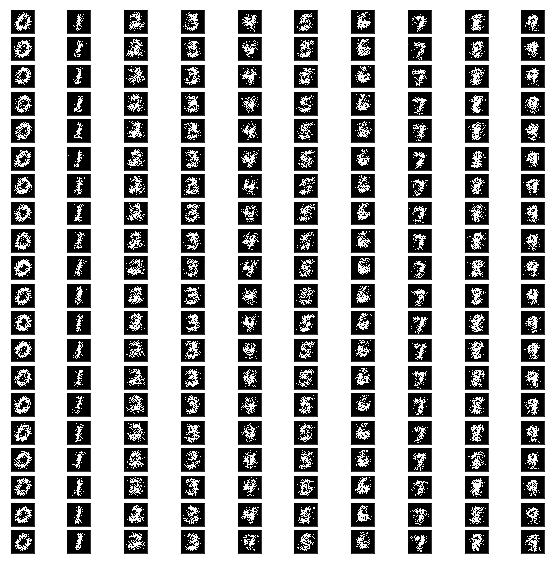

In [18]:
def P10(num_examples):
  plt.figure(figsize=(10,10))
  ### STUDENT START ###
  # Using Alpha value from above
  bern_NB=BernoulliNB(alpha=0.001)
  bern_NB.fit(mini_train_data, mini_train_labels)
  
  y_pred = bern_NB.predict(dev_data)

  index=1
  for example in range(1,num_examples+1):
    for j in range(0,10):
      plt.subplot(num_examples,10, index)
      # Labels aren't needed -- self explanatory what each column is
      #     plt.title('Label={}'.format(mini_train_labels[d['{}'.format(j)][0][row]]))
      plt.xticks([])
      plt.yticks([])
      # Generate Image Value
      img = (np.exp(bern_NB.feature_log_prob_[j]) >= 
             np.random.rand(28*28)).astype(int)
      plt.imshow(img.reshape(28,28), cmap='gray')
      index+=1
### STUDENT END ###

P10(20)

ANSWER: The digits are very pixelated compared to the ones in the examples, but they do clearly have the general shapes they should have. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [19]:
def P11(buckets, correct, total):
  #TODO START HERE
  ### STUDENT START ###
  
  #starting with copy to create cumulative in each bucket
  cum_correct = correct.copy() 
  cum_total = total.copy() 
  
  # Using Alpha value from above
  bern_NB=BernoulliNB(alpha=0.001)
  bern_NB.fit(mini_train_data, mini_train_labels)
  
  y_pred = bern_NB.predict(dev_data)
  y_pred_proba = bern_NB.predict_proba(dev_data)
#   print("bern_NB accuracy: {}".format(my_accuracy_score(dev_labels, y_pred)))
#   print('Predicted Proba',y_pred_proba[1][int(y_pred[1])])
#   print_image(dev_data[1])
#   print('Predicted Val: {}'.format(y_pred[1]))
#   print('Actual Val: {}'.format(dev_labels[1]))
  probabilities = y_pred_proba.max(axis=1)

  
  for j in range(0, y_pred.shape[0]):
    # note I'm going to fill each appropriate bucket
    for i, bucket in enumerate(buckets):
      if probabilities[j] <= bucket:
        if y_pred[j] == dev_labels[j]: # correct
          cum_correct[i] += 1
        cum_total[i] += 1 # increment total whether correct or not
  
  # now have cumulative totals and correct counts
  correct[:] = cum_correct
  total[:] = cum_total 
  ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
   accuracy = 0.0
   if (total[i] > 0): accuracy = correct[i] / total[i]
   print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  31    accuracy = 0.355
p(pred) <= 0.9990000000000    total =  98    accuracy = 0.408
p(pred) <= 0.9999900000000    total = 157    accuracy = 0.427
p(pred) <= 0.9999999000000    total = 203    accuracy = 0.478
p(pred) <= 0.9999999990000    total = 265    accuracy = 0.547
p(pred) <= 0.9999999999900    total = 298    accuracy = 0.574
p(pred) <= 0.9999999999999    total = 341    accuracy = 0.601
p(pred) <= 1.0000000000000    total = 1000    accuracy = 0.823


ANSWER: This appears to be a weakly calibrated classifier.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

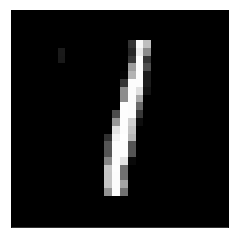

0

In [20]:
# Creaating function to count the number of enclosed areas in an image
def count_enclosed(img, threshold=0.4, ncols=28, DEBUG=False):
  '''methodology: two pass methodology described in wikipedia: 
  https://en.wikipedia.org/wiki/Connected-component_labeling
  
  '''
  new_img=img.copy()
  new_img = (new_img <= threshold).astype(np.int_).reshape(ncols,ncols)
#   print_image(new_img.reshape(ncols*ncols))
  labels = np.zeros(shape=(ncols,ncols))
  
  background_val = 0
  next_label = 1

  i=0

  linked = [set() for x in range(np.count_nonzero(img))]
#   print('nNonZeroElements={}'.format(np.count_nonzero(img)))
  
#   # First Pass:
  for row in range(ncols):
    for col in range(ncols):
      i+=1
#       print("Iteration: {}, linked={}".format(i, linked))

      if new_img[row,col] != background_val:
        neighbors = set()
      
        if row > 0: #omit look above for first row
          if new_img[row-1, col] != background_val:
            neighbors.add(int(labels[row-1, col]))
        
        if row < ncols-1: #omit look beneath for last row
          if new_img[row+1, col] != background_val:
            neighbors.add(int(labels[row+1, col]))
        
        if col > 0: #omit look left for first col
          if new_img[row, col-1] != background_val:
            neighbors.add(int(labels[row, col-1]))
            
        if col < ncols-1: #omit look right for last col
          if new_img[row, col+1] != background_val:
            neighbors.add(int(labels[row, col+1]))
        
        #because starting labels with 0, going to remove this
        neighbors.discard(background_val)
            
        if len(neighbors) == 0: # if neighbors is empty
          linked[next_label].add(int(next_label))
          labels[row, col] = next_label
          next_label += 1
        else:
#           print('made else statement, r={},c={}, n={}'.format(row,col, neighbors))
#           print('len={}'.format(len(neighbors)))
#           print('neighbors={}'.format(neighbors))
          # label becomes min of neighbors collected above
          labels[row,col] = min(neighbors)
          # now need to realign labels
          for label in neighbors:
            linked[int(label)].update(neighbors)

  if DEBUG:
    print('First Iteration image:')
    print_image(labels.reshape(ncols*ncols))


  # Clean up linked --only going 2 deep but could make recursive if time
  for l, link in enumerate(linked.copy()):
    if link:
      for j in link.copy():
        link.update(linked[j])
  

#   # Second pass
  for row in range(ncols):
    for col in range(ncols):
      if new_img[row,col] != background_val:
#         print('row={}, col={}, new_img={}'.format(row, col, new_img[row,col]))
#         print('linked[0]={}'.format(linked[0]))

#         print('XX', linked[new_img[row,col]])
        labels[row,col] = min(linked[int(labels[row,col])])
  
  if DEBUG:
    print('Final Iteration image:')
    print_image(labels.reshape(ncols*ncols))
    print("# Unique Values={}".format(np.unique(labels.reshape(ncols*ncols))))
  # subtract 2 to get the number of enclosed space
  # 1 is for the actual 'on' pixels
  return len(np.unique(labels.reshape(ncols*ncols)))-2

  

# #Testing

img_index = 49
print_image(mini_train_data[img_index])
# count_enclosed(mini_train_data[0], threshold=0.4, ncols=28)
count_enclosed(mini_train_data[img_index], threshold=0.4, ncols=28)

In [21]:
# Preprocess Data For # Enclosed Spaces
mini_train_data.shape
mini_train_enclosed_areas = np.apply_along_axis(count_enclosed, 1, mini_train_data)
dev_data_enclosed_areas = np.apply_along_axis(count_enclosed, 1, dev_data)

# append the # enclosed areas to the end of each image
mini_train_data_cpy = mini_train_data.copy()
print("Mini Train Data Shape Original: {}".format(mini_train_data.shape))

# print(mini_train_data_cpy.shape)
# print(mini_train_enclosed_areas[:, np.newaxis].shape)
mini_train_data_cpy = np.append(mini_train_data_cpy, 
                                mini_train_enclosed_areas[:, np.newaxis], 
                                axis=1)
print("Mini Train Data Copy Shape: {}".format(mini_train_data_cpy.shape))

# Now do the same for the dev data
dev_data_cpy = dev_data.copy()
dev_data_cpy = np.append(dev_data_cpy, 
                         dev_data_enclosed_areas[:, np.newaxis], 
                         axis=1)
print("Dev Data Original Shape: {}".format(dev_data.shape))
print("Dev Data Copy Shape: {}".format(dev_data_cpy.shape))


# bin the data -- essentially binarizing things between 0 and 1 and then keeping
# the nEnclosed areas separate

bins = np.array([-1, .6, 1, 2, 3])
mini_train_data_cpy_mult_class = np.digitize(mini_train_data_cpy, bins, right=True)
dev_data_cpy_mult_class = np.digitize(dev_data_cpy, bins, right=True)

Mini Train Data Shape Original: (1000, 784)
Mini Train Data Copy Shape: (1000, 785)
Dev Data Original Shape: (1000, 784)
Dev Data Copy Shape: (1000, 785)


In [22]:
def P12():
  # MultinomialNB Naive Bayes

  ### STUDENT START ###
  mult_NB = MultinomialNB()
  mult_NB.fit(mini_train_data_cpy_mult_class, mini_train_labels)
  y_pred = mult_NB.predict(dev_data_cpy_mult_class)
  acc = my_accuracy_score(dev_labels, y_pred)
  print("MultinomialNB NB accuracy: {}".format(acc))


  ### STUDENT END ###

P12()

MultinomialNB NB accuracy: 0.814


Above: Accuracy not as good as I would have hoped, but it's somewhat better